In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import tree
import re

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [2]:
def load_data():
    '''
    Загрузка данных
    '''
    data = pd.read_csv('health_unit_district_wise_covid_19_vaccination_in_tamilnadu_as_on_30_05_2021.csv')
    return data


def preprocess_data(data_in):
    '''
    Масштабирование признаков, функция возвращает X и y для кросс-валидации
    '''
    data_out = data_in.copy()
    # Числовые колонки для масштабирования
    scale_cols = ['Session planned for Covishield', 'Achievement towards vaccination of 1st Dosage Covishield to beneficiaries of 18 years and less than 44 years age group']
    new_cols = []
    sc1 = MinMaxScaler()
    sc1_data = sc1.fit_transform(data_out[scale_cols])
    for i in range(len(scale_cols)):
        col = scale_cols[i]
        new_col_name = col + '_scaled'
        new_cols.append(new_col_name)
        data_out[new_col_name] = sc1_data[:, i]
    X = data_out[new_cols]
    Y = data_out['Session held for Covishield']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)
    return X_train, X_test, y_train, y_test, X, Y


data = load_data()

In [3]:
data.head()

,S.No,Health Unit District,Session planned for Covishield,Session held for Covishield,Achievement towards vaccination of 1st Dosage Covishield to HCW,Achievement towards vaccination of 2nd Dosage Covishield to HCW,Achievement towards vaccination of 1st Dosage Covishield to FLW,Achievement towards vaccination of 2nd Dosage Covishield to FLW,Achievement towards vaccination of 1st Dosage Covishield to beneficiaries of 18 years and less than 44 years age group,Achievement towards vaccination of 2nd Dosage Covishield to beneficiaries of 18 years and less than 44 years age group,...,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to FLW,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to beneficiaries of 18 years and less than 44 years age group,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to beneficiaries of 18 years and less than 44 years age group,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to beneficiaries of 45 years and less than 60 years age group with Comorbidities,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to beneficiaries of 45 years and less than 60 years age group with Comorbidities,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to 60+ years beneficiaries with Comorbidities,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to 60+ years beneficiaries with Comorbidities,Total Achievement towards vaccination to beneficiaries under 1st Dose of Covishield and Covaxin,Total Achievement towards vaccination to beneficiaries under 2nd Dose of Covishield and Covaxin,Total Achievement towards vaccination of Covishield and Covaxin (1st and 2nd Dose)
0,1,Aranthangi,41,41,0,2,2,5,36,0,...,9,59,0,47,24,17,6,126,43,169
1,2,Ariyalur,66,66,15,7,5,10,585,0,...,10,625,0,281,17,32,8,958,42,1000
2,3,Attur,51,51,0,0,0,0,0,0,...,0,0,0,6,4,0,0,6,4,10
3,4,Chengalpet,30,30,10,0,1,0,346,0,...,4,1180,0,553,36,259,21,2003,61,2064
4,5,Chennai,90,90,27,3,110,7,2042,0,...,47,3993,0,2270,405,726,125,7179,655,7834


In [4]:
data.shape

(45, 45)

In [5]:
data.isnull().sum()

S.No                                                                                                                                                           0
Health Unit District                                                                                                                                           0
Session planned for Covishield                                                                                                                                 0
Session held for Covishield                                                                                                                                    0
Achievement towards vaccination of 1st Dosage Covishield to HCW                                                                                                0
Achievement towards vaccination of 2nd Dosage Covishield to HCW                                                                                                0
Achievement towards vaccination of

In [6]:
data.dtypes

S.No                                                                                                                                                            int64
Health Unit District                                                                                                                                           object
Session planned for Covishield                                                                                                                                  int64
Session held for Covishield                                                                                                                                     int64
Achievement towards vaccination of 1st Dosage Covishield to HCW                                                                                                 int64
Achievement towards vaccination of 2nd Dosage Covishield to HCW                                                                                                 int64
Achi

In [7]:
data.describe()

,S.No,Session planned for Covishield,Session held for Covishield,Achievement towards vaccination of 1st Dosage Covishield to HCW,Achievement towards vaccination of 2nd Dosage Covishield to HCW,Achievement towards vaccination of 1st Dosage Covishield to FLW,Achievement towards vaccination of 2nd Dosage Covishield to FLW,Achievement towards vaccination of 1st Dosage Covishield to beneficiaries of 18 years and less than 44 years age group,Achievement towards vaccination of 2nd Dosage Covishield to beneficiaries of 18 years and less than 44 years age group,Achievement towards vaccination of 1st Dosage Covishield to beneficiaries of 45 years and less than 60 years age group with Comorbidities,...,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to FLW,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to beneficiaries of 18 years and less than 44 years age group,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to beneficiaries of 18 years and less than 44 years age group,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to beneficiaries of 45 years and less than 60 years age group with Comorbidities,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to beneficiaries of 45 years and less than 60 years age group with Comorbidities,Total Achievement towards vaccination of 1st Dosage Covishield and Covaxin to 60+ years beneficiaries with Comorbidities,Total Achievement towards vaccination of 2nd Dosage Covishield and Covaxin to 60+ years beneficiaries with Comorbidities,Total Achievement towards vaccination to beneficiaries under 1st Dose of Covishield and Covaxin,Total Achievement towards vaccination to beneficiaries under 2nd Dose of Covishield and Covaxin,Total Achievement towards vaccination of Covishield and Covaxin (1st and 2nd Dose)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,...,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,23.000000,45.533333,44.955556,3.000000,1.333333,23.044444,1.222222,417.822222,0.0,307.511111,...,4.400000,637.155556,0.0,331.755556,55.200000,109.933333,26.955556,1107.222222,91.355556,1198.577778
std,13.133926,28.664676,29.017985,9.816498,3.636932,77.816788,2.754244,493.723344,0.0,531.891976,...,9.656369,768.935538,0.0,568.957706,80.459363,223.154797,42.491687,1393.188689,138.270676,1511.056817
min,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,24.000000,20.000000,0.000000,0.000000,0.000000,0.000000,42.000000,0.0,35.000000,...,0.000000,129.000000,0.0,53.000000,14.000000,7.000000,0.000000,315.000000,19.000000,396.000000
50%,23.000000,43.000000,43.000000,0.000000,0.000000,0.000000,0.000000,230.000000,0.0,122.000000,...,0.000000,398.000000,0.0,124.000000,30.000000,32.000000,8.000000,883.000000,55.000000,883.000000
75%,34.000000,61.000000,61.000000,0.000000,1.000000,4.000000,0.000000,585.000000,0.0,315.000000,...,4.000000,981.000000,0.0,344.000000,63.000000,113.000000,28.000000,1321.000000,85.000000,1455.000000
max,45.000000,105.000000,105.000000,58.000000,20.000000,415.000000,10.000000,2042.000000,0.0,2828.000000,...,47.000000,3993.000000,0.0,3007.000000,405.000000,1263.000000,200.000000,7179.000000,655.000000,7834.000000


In [9]:
sc1 = MinMaxScaler()
data['Session held for Covishield'] = sc1.fit_transform(data[['Session held for Covishield']])

### Разделяем выборку на тестовую и обучающую

In [10]:
X_train, X_test, Y_train, Y_test, X, Y = preprocess_data(data)
Y_test.head()

3     0.271845
2     0.475728
30    0.116505
21    0.058252
22    0.174757
Name: Session held for Covishield, dtype: float64

In [13]:
from sklearn.ensemble import RandomForestRegressor
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)
Y_predict = forest_1.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


<function matplotlib.pyplot.show(*args, **kw)>

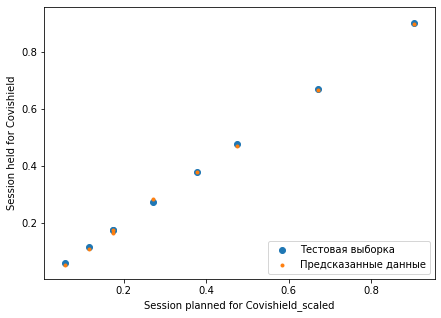

In [14]:
fig1 = plt.figure(figsize=(7, 5))
ax = plt.scatter(X_test['Session planned for Covishield_scaled'], Y_test, marker='o', label='Тестовая выборка')
plt.scatter(X_test['Session planned for Covishield_scaled'], Y_predict, marker='.', label='Предсказанные данные')
plt.legend(loc='lower right')
plt.xlabel('Session planned for Covishield_scaled')
plt.ylabel('Session held for Covishield')
plt.show

In [16]:
# Средняя абсолютная ошибка
mean_absolute_error(Y_test, Y_predict)

0.006040992448759425

In [17]:
# Коэффициент детерминации
r2_score(Y_test, Y_predict)

0.9992832492699761

In [18]:
# Градиентный бустинг
from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor(random_state=1)
grad.fit(X_train, Y_train)
Y_grad_pred = grad.predict(X_test)


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklear

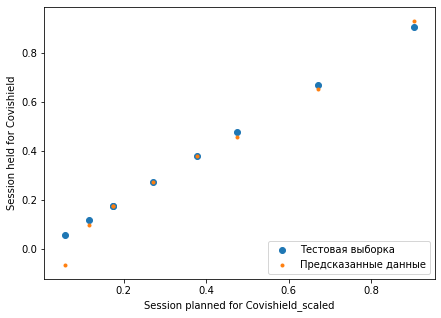

In [19]:
fig2 = plt.figure(figsize=(7, 5))
ax = plt.scatter(X_test['Session planned for Covishield_scaled'], Y_test, marker='o', label='Тестовая выборка')
plt.scatter(X_test['Session planned for Covishield_scaled'], Y_grad_pred, marker='.', label='Предсказанные данные')
plt.legend(loc='lower right')
plt.xlabel('Session planned for Covishield_scaled')
plt.ylabel('Session held for Covishield')
plt.show()

In [20]:
# Средняя абсолютная ошибка
mean_absolute_error(Y_test, Y_grad_pred)

0.023655256753379997

In [21]:
# Коэффициент детерминации
r2_score(Y_test, Y_grad_pred)

0.9725105936410773